In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import scipy.stats

%matplotlib inline

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url, index_col = 0)

In [3]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


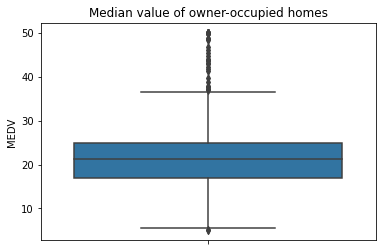

In [4]:
ax = seaborn.boxplot(y='MEDV', data=boston_df) 
plt.title("Median value of owner-occupied homes");

First quartile is <20, median lies between 20 and 25, outliers are above 40

In [5]:
boston_df['CHAS'] = boston_df['CHAS'].astype(int)

In [6]:
boston_df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
boston_df.loc[boston_df['CHAS'] == 1, 'CHAS'] = 'yes'
boston_df.loc[boston_df['CHAS'] == 0, 'CHAS'] = 'no'

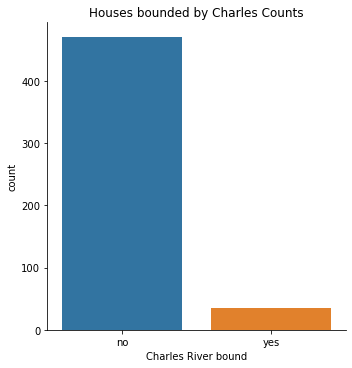

In [8]:
ax = seaborn.catplot(x='CHAS', kind='count', data=boston_df)
ax.set(xlabel='Charles River bound', title = "Houses bounded by Charles Counts");

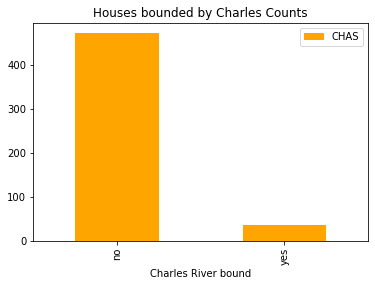

In [9]:
boston_df['CHAS'].value_counts().plot(kind = "bar" , color = "orange")
plt.title("Houses bounded by Charles Counts")
plt.xlabel("Charles River bound")
plt.legend();

Majority is not Charles river bound

In [10]:
boston_df.loc[(boston_df['AGE']<= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>= 70),'age_group'] = '70 years and older'

In [11]:
age_group = boston_df.groupby('age_group', as_index = False).MEDV.agg(["count", "mean", "std"])
age_group

,count,mean,std
age_group,,,
35 years and younger,91,27.775824,7.638198
70 years and older,287,19.793380,9.515375
between 35 and 70 years,128,24.947656,6.969370


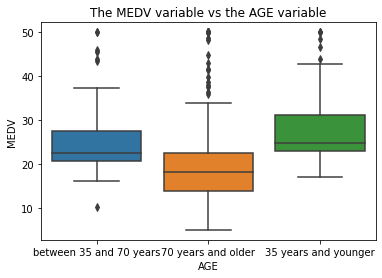

In [12]:
ax = seaborn.boxplot(x= 'age_group', y='MEDV', data=boston_df)
plt.title("The MEDV variable vs the AGE variable")
plt.xlabel("AGE");

MEDV boxes overlap, lowest median is for 70 and older, highest median is for 35 and younger

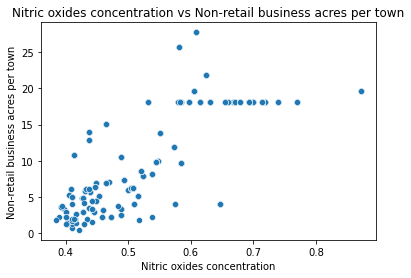

In [13]:
ax = seaborn.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title("Nitric oxides concentration vs Non-retail business acres per town");
plt.xlabel("Nitric oxides concentration")
plt.ylabel("Non-retail business acres per town")
plt.show();

Possible positive correlation between variables visualized by upward sloping curve

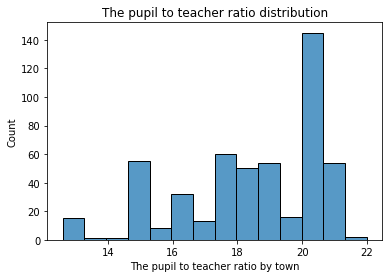

In [14]:
seaborn.histplot(boston_df['PTRATIO'])
plt.title("The pupil to teacher ratio distribution")
plt.xlabel("The pupil to teacher ratio by town")
plt.show();

Most prevalent ratio is 20.2

### Q1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

__T-test__

1. State your hypothesis.
* H0: There is no significant difference in the median value of houses bounded by the Charles river
* Ha: There is a significant difference in the median value of houses bounded by the Charles river

2. Use α = 0.05

3. Perform the test Statistics.

* Perform levene test to check the variances equality
+ H0: var1 = var2
+ Ha: var1 != var2

In [15]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 'yes']['MEDV'],
                 boston_df[boston_df['CHAS'] == 'no']['MEDV'],
                 center = 'mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

* Since the P-value = 0.003 less than 0.05 we reject the null hypothesis and conclude that var1 != var2

* We will use the T-test to check the hypothesis

In [16]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                     boston_df[boston_df['CHAS'] == 0]['MEDV'],
                     equal_var = False)

Ttest_indResult(statistic=nan, pvalue=nan)

4. State the conclusion from the test.
* Since the P-value of the T-test = 0.004 is less than α = 0.05 We reject the null hypothesis as there is enough evidence that there is a significant difference in the median value of houses bounded by the Charles river 

### Q2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

__ANOVA Test__

1. State your hypothesis.
* H0: There is no difference in median values of houses of each proportion of owner-occupied units built before 1940
* Ha: There is a difference in median values of houses of each proportion of owner-occupied units built before 1940

2. Use α = 0.05

3. Perform the test Statistics.
* We will use the ANOVA to check the hypothesis

In [17]:
thirtyfive_lower = boston_df.loc[(boston_df['AGE']<= 35),'AGE']
thirtyfive_seventy = boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70),'AGE']
seventy_older = boston_df.loc[(boston_df['AGE']>= 70),'AGE']

In [18]:
f_stats, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {}, P-Value: {}".format(f_stats, p_value))

F_Statistic: 2162.99425724172, P-Value: 9.005770381051771e-248


4. State the conclusion from the test.
* Since the P-value of the ANOVA test = 9.00577e-248 is less than α = 0.05 We reject the null hypothesis as there is enough evidence that there is a difference in median values of houses of each proportion of owner-occupied units built before 1940

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

__Pearson Correlation Test__

1. State your hypothesis.
* H0: There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
* Ha: There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

2. Use α = 0.05

3. Perform the test Statistics.
* We will use the Pearson Correlation

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

4. State the conclusion from the test.
* The P-value of the Person Correlation = 7.913e-98 is less than α = 0.05 We reject the null hypothesis as there is enough evidence that there is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
* Correlation coefficient value = 0.76365 which means strong positive correlation, represented visually by upward sloping curve


### Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

__Regression Analysis__

1. State your hypothesis.
* H0: β1 = 0 (weighted distance to the five Boston employment centres has no impact on he median value of owner-occupied homes)
* Ha: β1 is not equal to 0 (weighted distance to the five Boston employment centres has impact on he median value of owner-occupied homes)

2. Use α = 0.05

3. Perform the test Statistics.
* We will use Regression Analysis

In [20]:
import statsmodels.api as sm

In [21]:
X = boston_df['DIS']
y = boston_df['MEDV']

In [22]:
X = sm.add_constant(X)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [23]:
model = sm.OLS(y,X).fit()

In [24]:
predictions = model.predict(X)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 23 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        10:12:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

4. State the conclusion from the test.
* The p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that weighted distance to the five Boston employment centres has impact on he median value of owner-occupied homes
* The coefficient of the 'DIS' variable = 1.0916 which means that the weighted distances to five Boston employment centres increases the median value of owner-occupied homes by 1.0916